<script async src="https://www.googletagmanager.com/gtag/js?id=UA-59152712-8"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-59152712-8');
</script>

# Start-to-Finish Example: Setting up Exact Initial Data for Einstein's Equations, in Curvilinear Coordinates
## Authors: Brandon Clark, George Vopal, and Zach Etienne

## This module sets up initial data for a specified exact solution written in terms of ADM variables, using the [*Exact* ADM Spherical to BSSN Curvilinear initial data module](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py).

**Notebook Status:** <font color='green'><b> Validated </b></font>

**Validation Notes:** This module has been validated, confirming that all initial data sets exhibit convergence to zero of the Hamiltonian and momentum constraints at the expected rate or better.

### NRPy+ Source Code for this module:
* [BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py](../edit/BSSN/ADM_Exact_Spherical_or_Cartesian_to_BSSNCurvilinear.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Converting_Exact_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb): *Exact* Spherical ADM$\to$Curvilinear BSSN converter function
* [BSSN/BSSN_constraints.py](../edit/BSSN/BSSN_constraints.py); [\[**tutorial**\]](Tutorial-BSSN_constraints.ipynb): Hamiltonian & momentum constraints in BSSN curvilinear basis/coordinates

## Introduction:
Here we use NRPy+ to generate a C code confirming that specified *exact* initial data satisfy Einstein's equations of general relativity. The following exact initial data types are supported:

* Shifted Kerr-Schild spinning black hole initial data
* "Static" Trumpet black hole initial data
* Brill-Lindquist two black hole initial data
* UIUC black hole initial data

<a id='toc'></a>

# Table of Contents
$$\label{toc}$$

This notebook is organized as follows

0. [Preliminaries](#prelim): The Choices for Initial Data
    1. [Choice 1](#sks): Shifted Kerr-Schild spinning black hole initial data
    1. [Choice 2](#st):  "Static" Trumpet black hole initial data
    1. [Choice 3](#bl): Brill-Lindquist two black hole initial data
    1. [Choice 4](#uiuc): UIUC black hole initial data
1. [Step 2](#initializenrpy): Set core NRPy+ parameters for numerical grids and reference metric
1. [Step 3](#adm_id): Import Black Hole ADM initial data C function from NRPy+ module
1. [Step 4](#validate): Validating that the black hole initial data satisfy the Hamiltonian constraint
    1. [Step 4.a](#ham_const_output): Output C code for evaluating the Hamiltonian and Momentum constraint violation
    1. [Step 4.b](#apply_bcs): Apply singular, curvilinear coordinate boundary conditions
    1. [Step 4.c](#enforce3metric): Enforce conformal 3-metric $\det{\bar{\gamma}_{ij}}=\det{\hat{\gamma}_{ij}}$ constraint
1. [Step 5](#mainc): `Initial_Data.c`: The Main C Code
1. [Step 6](#plot): Plotting the initial data
1. [Step 7](#convergence): Validation: Convergence of numerical errors (Hamiltonian constraint violation) to zero
1. [Step 8](#latex_pdf_output): Output this notebook to $\LaTeX$-formatted PDF file

<a id='prelim'></a>

# Preliminaries: The Choices for Initial Data
$$\label{prelim}$$

<a id='sks'></a>

## Shifted Kerr-Schild spinning black hole initial data \[Back to [top](#toc)\]
$$\label{sks}$$

Here we use NRPy+ to generate initial data for a spinning black hole.

Shifted Kerr-Schild spinning black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of both the Hamiltonian and momentum constraint violations at the expected order to the exact solution.

**NRPy+ Source Code:**
* [BSSN/ShiftedKerrSchild.py](../edit/BSSN/ShiftedKerrSchild.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb)

The [BSSN.ShiftedKerrSchild](../edit/BSSN/ShiftedKerrSchild.py) NRPy+ module does the following:

1. Set up shifted Kerr-Schild initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-ShiftedKerrSchild.ipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='st'></a>

## "Static" Trumpet black hole initial data \[Back to [top](#toc)\]
$$\label{st}$$

Here we use NRPy+ to generate initial data for a single trumpet black hole ([Dennison & Baumgarte, PRD ???](https://arxiv.org/abs/??)).

"Static" Trumpet black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution. It was carefully ported from the [original NRPy+ code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/StaticTrumpet.py](../edit/BSSN/StaticTrumpet.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-StaticTrumpet.ipynb)

The [BSSN.StaticTrumpet](../edit/BSSN/StaticTrumpet.py) NRPy+ module does the following:

1. Set up static trumpet black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-StaticTrumpetBlackHole.ipynb). 
1. Convert the exact ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='bl'></a>

## Brill-Lindquist initial data \[Back to [top](#toc)\]
$$\label{bl}$$

Here we use NRPy+ to generate initial data for two black holes (Brill-Lindquist, [Brill & Lindquist, Phys. Rev. 131, 471, 1963](https://journals.aps.org/pr/abstract/10.1103/PhysRev.131.471); see also Eq. 1 of [Brandt & Brügmann, arXiv:gr-qc/9711015v1](https://arxiv.org/pdf/gr-qc/9711015v1.pdf)).

[//]: # " and then we use it to generate the RHS expressions for [Method of Lines](https://reference.wolfram.com/language/tutorial/NDSolveMethodOfLines.html) time integration based on the [explicit Runge-Kutta fourth-order scheme](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods) (RK4)."

Brill-Lindquist initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/BrillLindquist.py](../edit/BSSN/BrillLindquist.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb)
* [BSSN/BSSN_ID_function_string.py](../edit/BSSN/BSSN_ID_function_string.py)

The [BSSN.BrillLindquist](../edit/BSSN/BrillLindquist.py) NRPy+ module does the following:

1. Set up Brill-Lindquist initial data [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Cartesian basis**, as [documented here](Tutorial-ADM_Initial_Data-Brill-Lindquist.ipynb). 
1. Convert the ADM **Cartesian quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_ADMCartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='uiuc'></a>

## UIUC black hole initial data \[Back to [top](#toc)\]
$$\label{uiuc}$$ 

UIUC black hole initial data has been <font color='green'><b> validated </b></font> to exhibit convergence to zero of the Hamiltonian constraint violation at the expected order to the exact solution, and all quantities have been validated against the [original SENR code](https://bitbucket.org/zach_etienne/nrpy).

**NRPy+ Source Code:**
* [BSSN/UIUCBlackHole.py](../edit/BSSN/UIUCBlackHole.py); [\[**tutorial**\]](Tutorial-ADM_Initial_Data-UIUCBlackHole.ipynb)

The [BSSN.UIUCBlackHole](../edit/BSSN/UIUCBlackHole.py) NRPy+ module does the following:

1. Set up UIUC black hole initial data, represented by [ADM](https://en.wikipedia.org/wiki/ADM_formalism) quantities in the **Spherical basis**, as [documented here](Tutorial-ADM_Initial_Data-UIUCBlackHole.ipynb). 
1. Convert the numerical ADM **Spherical quantities** to **BSSN quantities in the desired Curvilinear basis** (set by `reference_metric::CoordSystem`), as [documented here](Tutorial-ADM_Initial_Data-Converting_Numerical_ADM_Spherical_or_Cartesian_to_BSSNCurvilinear.ipynb).
1. Sets up the standardized C function for setting all BSSN Curvilinear gridfunctions in a pointwise fashion, as [written here](../edit/BSSN/BSSN_ID_function_string.py), and returns the C function as a Python string.

<a id='-pickid'></a>

# Step 1: Specify the Initial Data to Test  \[Back to [top](#toc)\]
$$\label{pickid}$$

Here you have a choice for which initial data you would like to import and test for convergence. The following is a list of the currently compatible `initial_data_string` options for you to choose from.

* `"Shifted KerrSchild"`
* `"Static Trumpet"`
* `"Brill-Lindquist"`
* `"UIUC"`

In [1]:
import collections

#################
# For the User: Choose initial data, default is Shifted KerrSchild.
#               You are also encouraged to adjust any of the
#               DestGridCoordSystem, freeparams, or EnableMomentum parameters!
#               NOTE: Only DestGridCoordSystem == Spherical or SinhSpherical
#                     currently work out of the box; additional modifications
#                     will likely be necessary for other CoordSystems.
#################
initial_data_string = "Shifted KerrSchild" # "UIUC"


dictID = {}
IDmod_retfunc = collections.namedtuple('IDmod_retfunc', 'modulename functionname DestGridCoordSystem freeparams EnableMomentum')

dictID['Shifted KerrSchild']  = IDmod_retfunc(
    modulename = "BSSN.ShiftedKerrSchild", functionname = "ShiftedKerrSchild",
    DestGridCoordSystem = "Spherical",
    freeparams = ["params.M   = 1.0;", "params.a   = 0.9;", "params.r0 = 1.0;"],
    EnableMomentum = True)

dictID['Static Trumpet'] = IDmod_retfunc(
    modulename = "BSSN.StaticTrumpet", functionname = "StaticTrumpet",
    DestGridCoordSystem = "Spherical",
    freeparams = ["params.M = 1.0;"],
    EnableMomentum = False)

dictID['Brill-Lindquist'] = IDmod_retfunc(
    modulename = "BSSN.BrillLindquist", functionname = "BrillLindquist",
    DestGridCoordSystem = "SinhSpherical",
    freeparams = ["params.BH1_posn_x = 0.0; params.BH1_posn_y = 0.0; params.BH1_posn_z =+0.5;",
                  "params.BH2_posn_x = 0.0; params.BH2_posn_y = 0.0; params.BH2_posn_z =-0.5;",
                  "params.BH1_mass = 0.5;params.BH2_mass = 0.5;"],
    EnableMomentum = False)

dictID['UIUC'] = IDmod_retfunc(modulename = "BSSN.UIUCBlackHole", functionname = "UIUCBlackHole",
    DestGridCoordSystem = "SinhSpherical",
    freeparams = ["params.M = 1.0;", "params.chi = 0.99;"],
    EnableMomentum = True)

<a id='initializenrpy'></a>

# Step 2: Set up the needed NRPy+ infrastructure and declare core gridfunctions \[Back to [top](#toc)\]
$$\label{initializenrpy}$$

We will import the core modules of NRPy that we will need and specify the main gridfunctions we will need.

In [2]:
# Step P1: Import needed NRPy+ core modules:
from outputC import lhrh, outCfunction, outC_function_dict, add_to_Cfunction_dict, outC_function_master_list # NRPy+: Core C code output module
import finite_difference as fin  # NRPy+: Finite difference C code generation module
import NRPy_param_funcs as par   # NRPy+: Parameter interface
import grid as gri               # NRPy+: Functions having to do with numerical grids
import reference_metric as rfm   # NRPy+: Reference metric support
import cmdline_helper as cmd     # NRPy+: Multi-platform Python command-line interface
from pickling import pickle_NRPy_env, unpickle_NRPy_env  # NRPy+: Pickle/unpickle NRPy+ environment, for parallel codegen
import shutil, os, sys, time     # Standard Python modules for multiplatform OS-level functions, benchmarking

# Step P2: Create C code output directory:
Ccodesrootdir = os.path.join("InitialDataPlayground_Ccodes_new_way")
# First remove C code output directory if it exists
# Courtesy https://stackoverflow.com/questions/303200/how-do-i-remove-delete-a-folder-that-is-not-empty
shutil.rmtree(Ccodesrootdir, ignore_errors=True)
# Then create a fresh directory
cmd.mkdir(Ccodesrootdir)

# Step P3: Create executable output directory:
outdir = os.path.join(Ccodesrootdir, "output")
cmd.mkdir(outdir)

# Step 1.c: Enable "FD functions". In other words, all finite-difference stencils
#         will be output as inlined static functions. This is essential for
#         compiling highly complex FD kernels with using certain versions of GCC;
#         GCC 10-ish will choke on BSSN FD kernels at high FD order, sometimes
#         taking *hours* to compile. Unaffected GCC versions compile these kernels
#         in seconds. FD functions do not slow the code performance, but do add
#         another header file to the C source tree.
# With gcc 7.5.0, enable_FD_functions=True decreases performance by 10%
enable_FD_functions = False

# Step 2: Set some core parameters, including CoordSystem MoL timestepping algorithm,
#                                 FD order, floating point precision, and CFL factor:
# Choices are: Spherical, SinhSpherical, SinhSphericalv2, Cylindrical, SinhCylindrical,
#              SymTP, SinhSymTP
CoordSystem     = "Spherical"
par.set_parval_from_str("reference_metric::CoordSystem", CoordSystem)
rfm.reference_metric()

# Step 2.a: Set defaults for Coordinate system parameters.
#           These are perhaps the most commonly adjusted parameters,
#           so we enable modifications at this high level.

# domain_size sets the default value for:
#   * Spherical's params.RMAX
#   * SinhSpherical*'s params.AMAX
#   * Cartesians*'s -params.{x,y,z}min & .{x,y,z}max
#   * Cylindrical's -params.ZMIN & .{Z,RHO}MAX
#   * SinhCylindrical's params.AMPL{RHO,Z}
#   * *SymTP's params.AMAX
domain_size     = 3.0

# sinh_width sets the default value for:
#   * SinhSpherical's params.SINHW
#   * SinhCylindrical's params.SINHW{RHO,Z}
#   * SinhSymTP's params.SINHWAA
sinh_width      = 0.4 # If Sinh* coordinates chosen

# sinhv2_const_dr sets the default value for:
#   * SinhSphericalv2's params.const_dr
#   * SinhCylindricalv2's params.const_d{rho,z}
sinhv2_const_dr = 0.05# If Sinh*v2 coordinates chosen

# SymTP_bScale sets the default value for:
#   * SinhSymTP's params.bScale
SymTP_bScale    = 0.5 # If SymTP chosen

# Step 2.c: Set the order of spatial and temporal derivatives;
#           the core data type, and the CFL factor.
# RK_method choices include: Euler, "RK2 Heun", "RK2 MP", "RK2 Ralston", RK3, "RK3 Heun", "RK3 Ralston",
#              SSPRK3, RK4, DP5, DP5alt, CK5, DP6, L6, DP8
RK_method = "RK4"
FD_order  = 4            # Finite difference order: even numbers only, starting with 2. 12 is generally unstable
REAL      = "double"     # Best to use double here.
default_CFL_FACTOR= 0.5  # (GETS OVERWRITTEN IF SPECIFIED AT COMMAND LINE.)
                         # In pure axisymmetry (symmetry_axes = 2 below) 1.0 works fine. Otherwise 0.5 or lower.

In [3]:
# Step 5: Set the finite differencing order to FD_order (set above).
par.set_parval_from_str("finite_difference::FD_CENTDERIVS_ORDER", FD_order)

# Step 7: Set finite_difference::enable_FD_functions appropriately. Defaults to False
if enable_FD_functions:
    par.set_parval_from_str("finite_difference::enable_FD_functions", enable_FD_functions)

rfm.register_C_functions(enable_rfm_precompute=False, use_unit_wavespeed_for_find_timestep=True)
rfm.register_NRPy_basic_defines(enable_rfm_precompute=False)

<a id='adm_id'></a>

# Step 3: Import Black Hole ADM initial data C function from NRPy+ module \[Back to [top](#toc)\]
$$\label{adm_id}$$

In [4]:
# Import Black Hole initial data
import time
import importlib
starttime = time.time()
IDmodule = importlib.import_module(dictID[initial_data_string].modulename)
IDfunc = getattr(IDmodule, dictID[initial_data_string].functionname)
# Register initial_data() C function in C function dictionary;
#   prepends #include "NRPy_basic_defines.h" to top; and
#   returns pickled function (ignored)
_ignore = IDfunc(include_NRPy_basic_defines_and_pickle=True)
# import outputC as outC
# print(outC.outC_function_master_list)

<a id='cparams_rfm_and_domainsize'></a>

## Step 3.a: Output C codes needed for declaring and setting Cparameters; also set `free_parameters.h` \[Back to [top](#toc)\]
$$\label{cparams_rfm_and_domainsize}$$

Based on declared NRPy+ Cparameters, first we generate `declare_Cparameters_struct.h`, `set_Cparameters_default.h`, and `set_Cparameters[-SIMD].h`.

Then we output `free_parameters.h`, which sets initial data parameters, as well as grid domain & reference metric parameters, applying `domain_size` and `sinh_width`/`SymTP_bScale` (if applicable) as set above

In [5]:
# Step 3.a.i: Set free_parameters.h
# Output to $Ccodesdir/free_parameters.h reference metric parameters based on generic
#    domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale,
#    parameters set above.

outstr = ""
for line in dictID[initial_data_string].freeparams:
    outstr += line + "\n"
outstr += rfm.out_default_free_parameters_for_rfm("returnstring",
                                                  domain_size,sinh_width,sinhv2_const_dr,SymTP_bScale)
with open(os.path.join(Ccodesrootdir,"free_parameters.h"),"w") as file:
    file.write(outstr.replace("params.", "griddata.params."))

<a id='validate'></a>

# Step 4: Validating that the black hole initial data satisfy the BSSN Hamiltonian and momentum constraints \[Back to [top](#toc)\]
$$\label{validate}$$

We will validate that the black hole initial data satisfy the Hamiltonian constraint, modulo numerical finite differencing error.

In [6]:
import BSSN.BSSN_Ccodegen_library as BCl
_ignore = BCl.add_Ricci_eval_to_Cfunction_dict(includes=["NRPy_basic_defines.h"], rel_path_to_Cparams=os.path.join("."),
                                               enable_rfm_precompute=False, enable_golden_kernels=False, enable_SIMD=False,
                                               enable_split_for_optimizations_doesnt_help=False, OMP_pragma_on="i2")

_ignore = BCl.add_BSSN_constraints_to_Cfunction_dict(includes=["NRPy_basic_defines.h"],
                                                     rel_path_to_Cparams=os.path.join("."), output_H_only=False,
                                                     enable_rfm_precompute=False, enable_SIMD=False,
                                                     leave_Ricci_symbolic=True)

Generating symbolic expressions for 3-Ricci tensor (Spherical coords)...
Finished generating symbolic expressions for 3-Ricci tensor (Spherical coords) in 0.4 seconds. Next up: C codegen...
Generating C code for 3-Ricci tensor (FD order=4) (Spherical coords)...
Finished generating C code for 3-Ricci tensor (FD order=4) (Spherical coords) in 7.7 seconds.
Generating symbolic expressions for BSSN constraints (Spherical coords)...
Finished generating symbolic expressions for BSSN constraints (Spherical coords) in 0.5 seconds. Next up: C codegen...
Generating C code for BSSN constraints (FD order=4) (Spherical coords)...
Finished generating C code for BSSN constraints (FD order=4) (Spherical coords) in 2.3 seconds.


<a id='mainc'></a>

# Step 5: `Initial_Data_Playground.c`: The Main C Code \[Back to [top](#toc)\]
$$\label{mainc}$$

First some diagnostics, which will output data at points closest to the xy plane.

In [7]:
import diagnostics_generic.output_xz_or_xy_plane as planar_diags

def add_to_Cfunction_dict_xy_plane_diagnostics():
    includes = ["NRPy_basic_defines.h", "NRPy_function_prototypes.h"]
    desc = """Output various quantities at points closest to
the given coordinate system's xy plane.
"""
    c_type = "void"
    name = "xy_plane_diagnostics"
    params = """const griddata_struct *restrict griddata,
    const REAL *restrict y_n_gfs, const REAL *restrict diagnostic_output_gfs"""
    body  = planar_diags.output_plane_xz_or_xy_body(plane="xy", include_ghosts=False)
    body += r"""
  LOOP_NOOMP(i0_pt,0,numpts_i0, i1_pt,0,numpts_i1, i2_pt,0,numpts_i2) {
    const int i0 = i0_pts[i0_pt], i1 = i1_pts[i1_pt], i2 = i2_pts[i2_pt];
    REAL xCart[3];
    xx_to_Cart(&params, xx, i0,i1,i2, xCart);
    int idx = IDX3S(i0,i1,i2);
    printf("%e %e %e %e %e %e %e %e\n",xCart[0],xCart[1],xCart[2], y_n_gfs[IDX4ptS(CFGF,idx)],
           log10(fabs(diagnostic_output_gfs[IDX4ptS(HGF,idx)])),
           log10(fabs(diagnostic_output_gfs[IDX4ptS(MU0GF,idx)])+1e-15),
           log10(fabs(diagnostic_output_gfs[IDX4ptS(MU1GF,idx)])+1e-15),
           log10(fabs(diagnostic_output_gfs[IDX4ptS(MU2GF,idx)])+1e-15));
  }
"""
    add_to_Cfunction_dict(
        includes=includes,
        desc=desc,
        c_type=c_type, name=name, params=params,
        body=body,
        rel_path_to_Cparams=os.path.join("."), enableCparameters=False)

In [8]:
def add_to_Cfunction_dict_main__Initial_Data_Playground():
    includes = ["NRPy_basic_defines.h", "NRPy_function_prototypes.h", "time.h"]
    desc = """// main() function:
// Step 0: Read command-line input, set up grid structure, allocate memory for gridfunctions, set up coordinates
// Step 1: Set up initial data to an exact solution
// Step 2: Output data on xy plane to file.
// Step 3: Free all allocated memory
"""
    c_type = "int"
    name = "main"
    params = "int argc, const char *argv[]"
    body = r"""  griddata_struct griddata;
  set_Cparameters_to_default(&griddata.params);

  // Step 0.a: Set free parameters, overwriting Cparameters defaults
  //          by hand or with command-line input, as desired.
#include "free_parameters.h"

  // Step 0.b: Read command-line input, error out if nonconformant
  if((argc != 4) || atoi(argv[1]) < NGHOSTS || atoi(argv[2]) < NGHOSTS || atoi(argv[3]) < 2 /* FIXME; allow for axisymmetric sims */) {
    fprintf(stderr,"Error: Expected three command-line arguments: ./BrillLindquist_Playground Nx0 Nx1 Nx2,\n");
    fprintf(stderr,"where Nx[0,1,2] is the number of grid points in the 0, 1, and 2 directions.\n");
    fprintf(stderr,"Nx[] MUST BE larger than NGHOSTS (= %d)\n",NGHOSTS);
    exit(1);
  }
  // Step 0.c: Check grid structure, first in space...
  const int Nxx[3] = { atoi(argv[1]), atoi(argv[2]), atoi(argv[3]) };
  if(Nxx[0]%2 != 0 || Nxx[1]%2 != 0 || Nxx[2]%2 != 0) {
    fprintf(stderr,"Error: Cannot guarantee a proper cell-centered grid if number of grid cells not set to even number.\n");
    fprintf(stderr,"       For example, in case of angular directions, proper symmetry zones will not exist.\n");
    exit(1);
  }

  // Step 0.d: Uniform coordinate grids are stored to *xx[3]
  // Step 0.d.i: Set bcstruct
  {
    // Step 0.f: Call set_Nxx_dxx_invdx_params__and__xx(), which sets
    //          params Nxx,Nxx_plus_2NGHOSTS,dxx,invdx, and xx[] for the
    //          chosen (non-Eigen) CoordSystem.
    int EigenCoord = 0;
    set_Nxx_dxx_invdx_params__and__xx(EigenCoord, Nxx, &griddata.params, griddata.xx);
  }

  // Step 0.j: Allocate memory for y_n_gfs gridfunctions
  const int Nxx_plus_2NGHOSTS0 = griddata.params.Nxx_plus_2NGHOSTS0;
  const int Nxx_plus_2NGHOSTS1 = griddata.params.Nxx_plus_2NGHOSTS1;
  const int Nxx_plus_2NGHOSTS2 = griddata.params.Nxx_plus_2NGHOSTS2;
  const int grid_size = Nxx_plus_2NGHOSTS0*Nxx_plus_2NGHOSTS1*Nxx_plus_2NGHOSTS2;
  REAL *restrict y_n_gfs = (REAL *restrict)malloc(sizeof(REAL)*grid_size*NUM_EVOL_GFS);

  // Step 0.l: Set up initial data to an exact solution
  initial_data(&griddata.params, griddata.xx, y_n_gfs);

  REAL *restrict auxevol_gfs = (REAL *restrict)malloc(sizeof(REAL)*grid_size*NUM_AUXEVOL_GFS);
  REAL *restrict aux_gfs = (REAL *restrict)malloc(sizeof(REAL)*grid_size*NUM_AUX_GFS);

  // To simplify the expressions somewhat, we compute & store the Ricci tensor separately
  //    from the BSSN constraints.
  Ricci_eval(&griddata.params, griddata.xx, y_n_gfs, auxevol_gfs);
  BSSN_constraints(&griddata.params, griddata.xx, y_n_gfs, auxevol_gfs, aux_gfs);

  xy_plane_diagnostics(&griddata, y_n_gfs, aux_gfs);

  // Step 4: Free all allocated memory
  free(y_n_gfs);
  free(auxevol_gfs);
  free(aux_gfs);
  for(int i=0;i<3;i++) free(griddata.xx[i]);

  return 0;
"""
    add_to_Cfunction_dict(
        includes=includes,
        desc=desc,
        c_type=c_type, name=name, params=params,
        body=body,
        rel_path_to_Cparams=os.path.join("."), enableCparameters=False)

In [9]:
add_to_Cfunction_dict_xy_plane_diagnostics()
add_to_Cfunction_dict_main__Initial_Data_Playground()

In [10]:
import outputC as outC
outC.outputC_register_C_functions_and_NRPy_basic_defines()  # #define M_PI, etc.
# Declare paramstruct, register set_Cparameters_to_default(),
#   and output declare_Cparameters_struct.h and set_Cparameters[].h:
outC.NRPy_param_funcs_register_C_functions_and_NRPy_basic_defines(os.path.join(Ccodesrootdir))
par.register_NRPy_basic_defines()  # add `paramstruct params` to griddata struct.

gri.register_C_functions_and_NRPy_basic_defines()  # #define IDX3S(), etc.
fin.register_C_functions_and_NRPy_basic_defines(NGHOSTS_account_for_onezone_upwind=False,
                                                enable_SIMD=False)  # #define NGHOSTS, and UPWIND() macro if SIMD disabled

# Output functions for computing all finite-difference stencils.
#   Must be called after defining all functions depending on FD stencils.
if enable_FD_functions:
    fin.output_finite_difference_functions_h(path=Ccodesrootdir)

# Call this last: Set up NRPy_basic_defines.h and NRPy_function_prototypes.h.
outC.construct_NRPy_basic_defines_h(Ccodesrootdir, enable_SIMD=False)
outC.construct_NRPy_function_prototypes_h(Ccodesrootdir)

In [11]:
import cmdline_helper as cmd
cmd.new_C_compile(Ccodesrootdir, "Initial_Data_Playground",
                  uses_free_parameters_h=True, compiler_opt_option="fast") # fastdebug or debug also supported

# Change to output directory
os.chdir(Ccodesrootdir)

cmd.delete_existing_files("out*.txt")
cmd.delete_existing_files("out*.png")
args_output_list = [["96 96 96", "out96.txt"], ["48 48 48", "out48.txt"]]
for args_output in args_output_list:
    cmd.Execute("Initial_Data_Playground", args_output[0], args_output[1])

(EXEC): Executing `make -j18`...
(BENCH): Finished executing in 2.0066299438476562 seconds.
Finished compilation.
(EXEC): Executing `taskset -c 1,3,5,7,9,11,13,15 ./Initial_Data_Playground 96 96 96`...
(BENCH): Finished executing in 0.20248794555664062 seconds.
(EXEC): Executing `taskset -c 1,3,5,7,9,11,13,15 ./Initial_Data_Playground 48 48 48`...
(BENCH): Finished executing in 0.20304274559020996 seconds.


<a id='plot'></a>

# Step 6: Plotting the  initial data \[Back to [top](#toc)\]
$$\label{plot}$$

Here we plot the evolved conformal factor of these initial data on a 2D grid, such that darker colors imply stronger gravitational fields. Hence, we see the black hole(s) centered at $x/M=\pm 1$, where $M$ is an arbitrary mass scale (conventionally the [ADM mass](https://en.wikipedia.org/w/index.php?title=ADM_formalism&oldid=846335453) is chosen), and our formulation of Einstein's equations adopt $G=c=1$ [geometrized units](https://en.wikipedia.org/w/index.php?title=Geometrized_unit_system&oldid=861682626).

In [12]:
# First install scipy if it's not yet installed. This will have no effect if it's already installed.
!pip install scipy

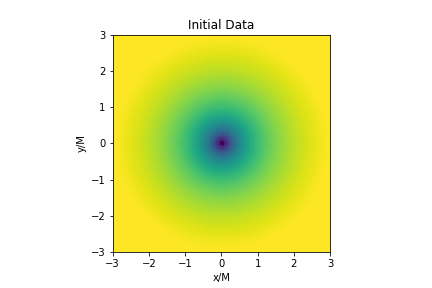

In [13]:
import numpy as np
from scipy.interpolate import griddata
from pylab import savefig
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from IPython.display import Image

x96,y96,z96,valuesCF96,valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96 = np.loadtxt('out96.txt').T #Transposed for easier unpacking


pl_xmin = -3.
pl_xmax = +3.
pl_ymin = -3.
pl_ymax = +3.

grid_x, grid_y = np.mgrid[pl_xmin:pl_xmax:100j, pl_ymin:pl_ymax:100j]
points96 = np.zeros((len(x96), 2))
for i in range(len(x96)):
    points96[i][0] = x96[i]
    points96[i][1] = y96[i]

grid96 = griddata(points96, valuesCF96, (grid_x, grid_y), method='nearest')
grid96cub = griddata(points96, valuesCF96, (grid_x, grid_y), method='cubic')

plt.clf()
plt.title("Initial Data")
plt.xlabel("x/M")
plt.ylabel("y/M")

# fig, ax = plt.subplots()
#ax.plot(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
plt.imshow(grid96.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
savefig("ID.png")
plt.close()
Image("ID.png")
# #           interpolation='nearest', cmap=cm.gist_rainbow)

<a id='convergence'></a>

# Step 7: Validation: Convergence of numerical errors (Hamiltonian & momentum constraint violations) to zero \[Back to [top](#toc)\]
$$\label{convergence}$$

**Special thanks to George Vopal for creating the following plotting script.**

The equations behind these initial data solve Einstein's equations exactly, at a single instant in time. One reflection of this solution is that the Hamiltonian constraint violation should be exactly zero in the initial data. 

However, when evaluated on numerical grids, the Hamiltonian constraint violation will *not* generally evaluate to zero due to the associated numerical derivatives not being exact. However, these numerical derivatives (finite difference derivatives in this case) should *converge* to the exact derivatives as the density of numerical sampling points approaches infinity.

In this case, all of our finite difference derivatives agree with the exact solution, with an error term that drops with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$. 

Here, as in the [Start-to-Finish Scalar Wave (Cartesian grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWave.ipynb) and the [Start-to-Finish Scalar Wave (curvilinear grids) NRPy+ tutorial](Tutorial-Start_to_Finish-ScalarWaveCurvilinear.ipynb) we confirm this convergence.

First, let's take a look at what the numerical error looks like on the x-y plane at a given numerical resolution, plotting $\log_{10}|H|$, where $H$ is the Hamiltonian constraint violation:

<Figure size 432x288 with 0 Axes>

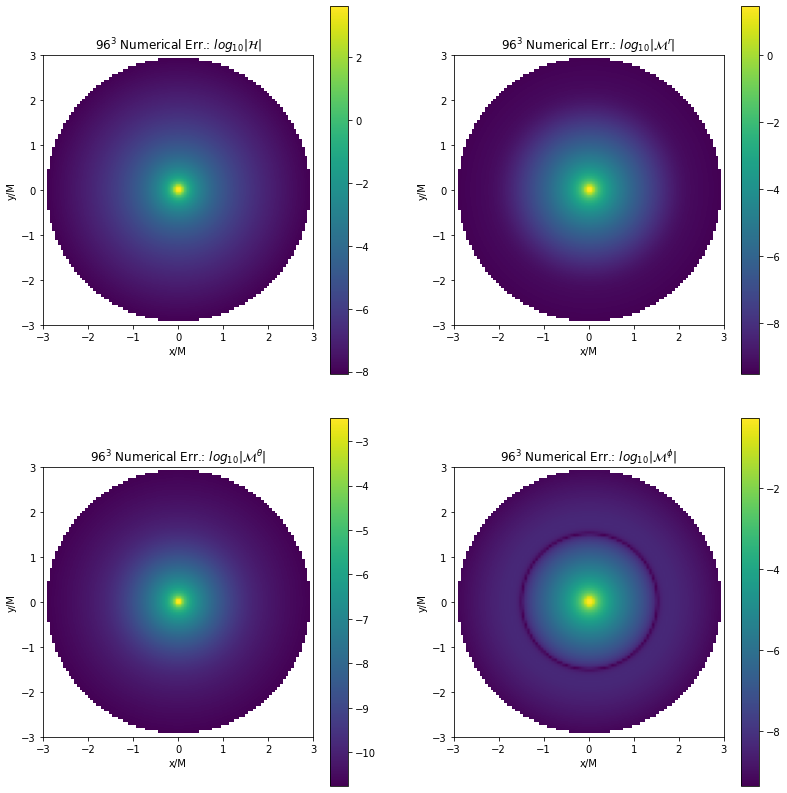

In [14]:
RefData=[valuesHam96,valuesmomr96,valuesmomtheta96,valuesmomphi96]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
axN = [] #this will let us automate the subplots in the loop that follows
grid96N = [] #we need to calculate the grid96 data for each constraint for use later
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constraints (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

num_plots = 4

if dictID[initial_data_string].EnableMomentum == False:
    num_plots = 1


for p in range(num_plots):
    grid96 = griddata(points96, RefData[p], (grid_x, grid_y), method='nearest')
    grid96N.append(grid96)
    grid96cub = griddata(points96, RefData[p], (grid_x, grid_y), method='cubic')

    #fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)


    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2

    axN[p].set_xlabel('x/M')
    axN[p].set_ylabel('y/M')
    axN[p].set_title('$96^3$ Numerical Err.: $log_{10}|'+SubTitles[p]+'|$')

    fig96cub = plt.imshow(grid96cub.T, extent=(pl_xmin,pl_xmax, pl_ymin,pl_ymax))
    cb = plt.colorbar(fig96cub)

# Adjust the spacing between plots
plt.tight_layout(pad=4)

Next, we set up the same initial data but on a lower-resolution, $48^3$ grid. Since the constraint violation (numerical error associated with the fourth-order-accurate, finite-difference derivatives) should converge to zero with the uniform gridspacing to the fourth power: $\left(\Delta x^i\right)^4$, we expect the constraint violation will increase (relative to the $96^3$ grid) by a factor of $\left(96/48\right)^4$. Here we demonstrate that indeed this order of convergence is observed as expected. I.e., at all points *except* at the points immediately surrounding the coordinate center of the black hole (due to the spatial slice excising the physical singularity at this point through [the puncture method](http://gr.physics.ncsu.edu/UMD_June09.pdf)) exhibit numerical errors that drop as $\left(\Delta x^i\right)^4$.

<Figure size 432x288 with 0 Axes>

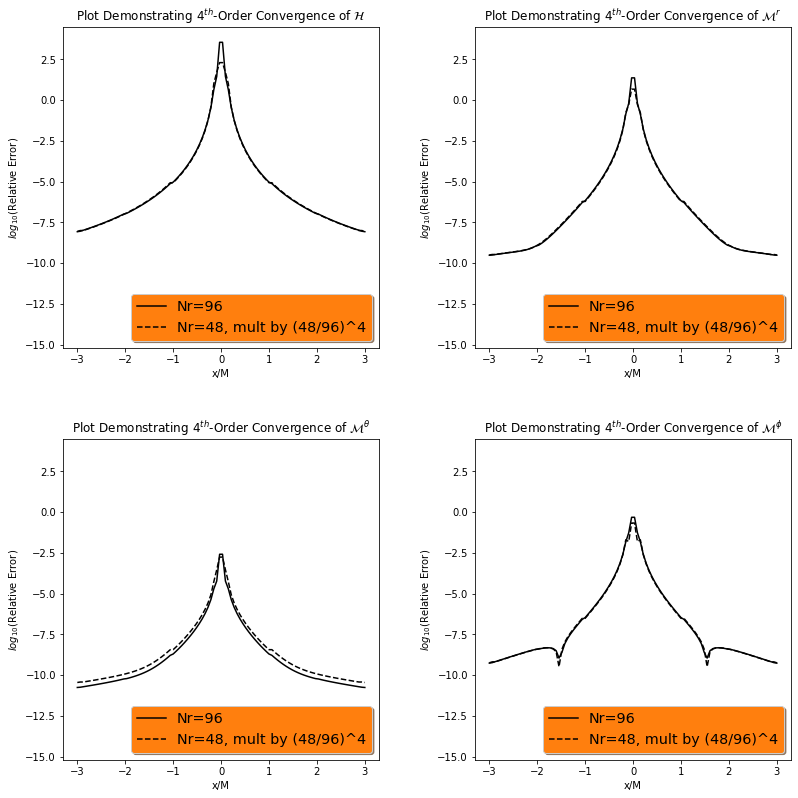

In [15]:
x48,y48,z48,valuesCF48,valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48 = np.loadtxt('out48.txt').T #Transposed for easier unpacking
points48 = np.zeros((len(x48), 2))
for i in range(len(x48)):
    points48[i][0] = x48[i]
    points48[i][1] = y48[i]

RefData=[valuesHam48,valuesmomr48,valuesmomtheta48,valuesmomphi48]
SubTitles=["\mathcal{H}",'\mathcal{M}^r',r"\mathcal{M}^{\theta}","\mathcal{M}^{\phi}"]
if "Cartesian" in CoordSystem:
    SubTitles=["\mathcal{H}",'\mathcal{M}^x',r"\mathcal{M}^{y}","\mathcal{M}^{z}"]

axN = []
plt.clf()

# We want to create four plots. One for the Hamiltonian, and three for the momentum
# constrains (r,th,ph)
# Define the size of the overall figure
fig = plt.figure(figsize=(12,12)) # 8 in x 8 in

for p in range(num_plots): #loop to cycle through our constraints and plot the data
    grid48 = griddata(points48, RefData[p], (grid_x, grid_y), method='nearest')
    griddiff_48_minus_96 = np.zeros((100,100))
    griddiff_48_minus_96_1darray = np.zeros(100*100)
    gridx_1darray_yeq0 = np.zeros(100)
    grid48_1darray_yeq0 = np.zeros(100)
    grid96_1darray_yeq0 = np.zeros(100)
    count = 0
    for i in range(100):
        for j in range(100):
            griddiff_48_minus_96[i][j] = grid48[i][j] - grid96N[p][i][j]
            griddiff_48_minus_96_1darray[count] = griddiff_48_minus_96[i][j]
            if j==49:
                gridx_1darray_yeq0[i] = grid_x[i][j]
                grid48_1darray_yeq0[i] = grid48[i][j] + np.log10((48./96.)**4)
                grid96_1darray_yeq0[i] = grid96N[p][i][j]
            count = count + 1

    #Generate the subplot for the each constraint
    ax = fig.add_subplot(221+p)
    axN.append(ax) # Grid of 2x2
    axN[p].set_title('Plot Demonstrating $4^{th}$-Order Convergence of $'+SubTitles[p]+'$')
    axN[p].set_xlabel("x/M")
    axN[p].set_ylabel("$log_{10}$(Relative Error)")

    ax.plot(gridx_1darray_yeq0, grid96_1darray_yeq0, 'k-', label='Nr=96')
    ax.plot(gridx_1darray_yeq0, grid48_1darray_yeq0, 'k--', label='Nr=48, mult by (48/96)^4')
    ax.set_ylim([-15.2,4.5])

    legend = ax.legend(loc='lower right', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('C1')

# Adjust the spacing between plots
plt.tight_layout(pad=4)

<a id='latex_pdf_output'></a>

# Step 7: Output this notebook to $\LaTeX$-formatted PDF file \[Back to [top](#toc)\]
$$\label{latex_pdf_output}$$

The following code cell converts this Jupyter notebook into a proper, clickable $\LaTeX$-formatted PDF file. After the cell is successfully run, the generated PDF may be found in the root NRPy+ tutorial directory, with filename
[Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_new_way.pdf](Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_new_way.pdf) (Note that clicking on this link may not work; you may need to open the PDF file through another means.)

In [16]:
import cmdline_helper as cmd    # NRPy+: Multi-platform Python command-line interface
cmd.output_Jupyter_notebook_to_LaTeXed_PDF("Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_new_way")

[NbConvertApp] WARNING | pattern 'Tutorial-Start_to_Finish-BSSNCurvilinear-Setting_up_Exact_Initial_Data_new_way.ipynb' matched no files
Created Tutorial-Start_to_Finish-BSSNCurvilinear-
    Setting_up_Exact_Initial_Data_new_way.tex, and compiled LaTeX file to
    PDF file Tutorial-Start_to_Finish-BSSNCurvilinear-
    Setting_up_Exact_Initial_Data_new_way.pdf
